<a href="https://colab.research.google.com/github/Fathaa/W1764460/blob/main/w1764460.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
!pip install -q yfinance

In [131]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [132]:
stock_data = yf.download('AAPL', start='2010-01-01', end='2021-12-31')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443572,447610800


In [133]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.995621,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016129,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983673,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.901627,59773000


In [134]:
stock_data = stock_data.reset_index()
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443572,447610800


In [135]:
stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)
stock_data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


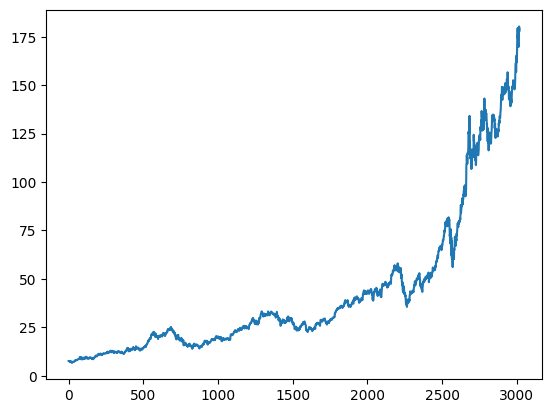

In [136]:
plt.plot(stock_data.Close)

In [137]:
stock_data

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3015,175.850006,176.850006,175.270004,176.279999,68356600
3016,177.089996,180.419998,177.070007,180.330002,74919600
3017,180.160004,181.330002,178.529999,179.289993,79144300
3018,179.330002,180.630005,178.139999,179.380005,62348900


In [138]:
ma100 = stock_data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3015    153.0106
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
Name: Close, Length: 3020, dtype: float64

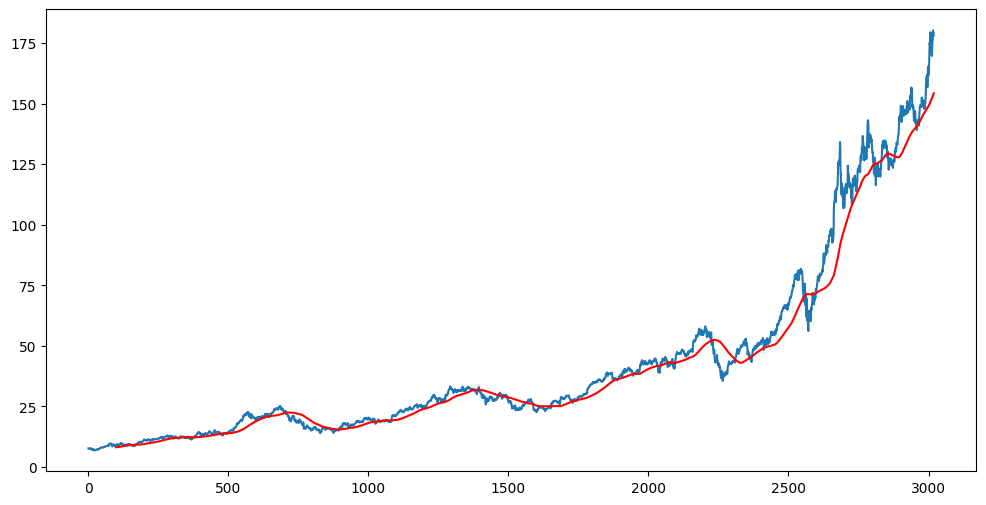

In [139]:
plt.figure(figsize= (12,6))
plt.plot(stock_data.Close)
plt.plot(ma100, 'r')

In [140]:
ma200 = stock_data.rolling(200).mean()
ma200 

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3015,142.309051,143.792650,141.09790,142.55920,86177557.5
3016,142.592501,144.088900,141.38745,142.85570,86111630.0
3017,142.886251,144.375550,141.67800,143.13220,86045332.5
3018,143.154401,144.642600,141.94510,143.40125,85780937.5


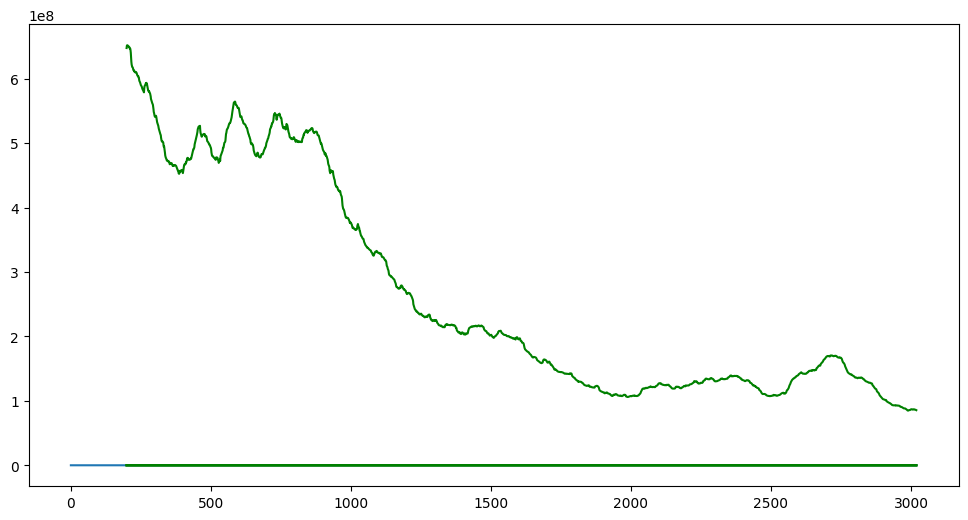

In [141]:
plt.figure(figsize = (12,6))
plt.plot(stock_data.Close)
plt.plot(ma200, 'g')

In [142]:
stock_data.shape

(3020, 5)

In [143]:
#TRAINING AND TESTING OF THE DATA

data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
data_testing = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70): int(len(stock_data))])

print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [144]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [145]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [146]:
scaler = MinMaxScaler(feature_range=(0,1))

In [147]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [148]:
data_training_array.shape

(2114, 1)

In [149]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])


x_train, y_train = np.array(x_train), np.array(y_train) 

In [150]:
x_train.shape

(2014, 100, 1)

MACHINE LEARNING MODEL

In [151]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [152]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))



In [153]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [112]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
63/63 [==============================] - 29s 353ms/step - loss: 0.0422
Epoch 2/50
63/63 [==============================] - 22s 353ms/step - loss: 0.0087
Epoch 3/50
63/63 [==============================] - 22s 352ms/step - loss: 0.0080
Epoch 4/50
63/63 [==============================] - 22s 353ms/step - loss: 0.0076
Epoch 5/50
63/63 [==============================] - 22s 348ms/step - loss: 0.0067
Epoch 6/50
63/63 [==============================] - 22s 352ms/step - loss: 0.0057
Epoch 7/50
63/63 [==============================] - 22s 354ms/step - loss: 0.0059
Epoch 8/50
63/63 [==============================] - 23s 359ms/step - loss: 0.0054
Epoch 9/50
63/63 [==============================] - 22s 355ms/step - loss: 0.0055
Epoch 10/50
63/63 [==============================] - 21s 338ms/step - loss: 0.0049
Epoch 11/50
63/63 [==============================] - 22s 353ms/step - loss: 0.0045
Epoch 12/50
63/63 [==============================] - 23s 368ms/step - loss: 0.0046
Epoch 13/50
6

In [113]:
model.save('Stocktopia_model.h5')

In [114]:
data_testing.head() 

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [115]:
data_training.tail(100)

,Close
2014,43.057499
2015,43.257500
2016,43.750000
2017,43.587502
2018,43.582500
...,...
2109,46.907501
2110,46.790001
2111,47.090000
2112,47.037498


In [116]:
past_100_days = data_training.tail(100)

In [117]:
final_stock_data = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-117-79ef9f705b5a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_stock_data = past_100_days.append(data_testing, ignore_index=True)


In [118]:
final_stock_data.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [119]:
input_data = scaler.fit_transform(final_stock_data)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99281675],
       [0.99343845],
       [0.98528824]])

In [120]:
input_data.shape

(1006, 1)

In [121]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [122]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [123]:
#Making Predictions 

y_predicted = model.predict(x_test)

29/29 [==============================] - 3s 95ms/step


In [124]:
y_predicted.shape

(906, 1)

In [125]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [126]:
y_predicted

array([[0.15176769],
       [0.15222585],
       [0.15263373],
       [0.15299228],
       [0.15332532],
       [0.15366745],
       [0.1540516 ],
       [0.15449977],
       [0.15501219],
       [0.15556191],
       [0.15611356],
       [0.1566446 ],
       [0.1571268 ],
       [0.15754071],
       [0.15786721],
       [0.15809552],
       [0.15820897],
       [0.15820685],
       [0.15809602],
       [0.15788503],
       [0.15757531],
       [0.15719037],
       [0.15675834],
       [0.1563144 ],
       [0.15588535],
       [0.1555041 ],
       [0.15517035],
       [0.15488383],
       [0.154663  ],
       [0.15453859],
       [0.15452547],
       [0.15460165],
       [0.15475957],
       [0.15499304],
       [0.15528454],
       [0.15561713],
       [0.15596631],
       [0.15631986],
       [0.15666702],
       [0.1569993 ],
       [0.15732023],
       [0.15764666],
       [0.15798877],
       [0.1583237 ],
       [0.15861955],
       [0.15885672],
       [0.15911108],
       [0.159

In [127]:
scaler.scale_

array([0.00690691])

In [128]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

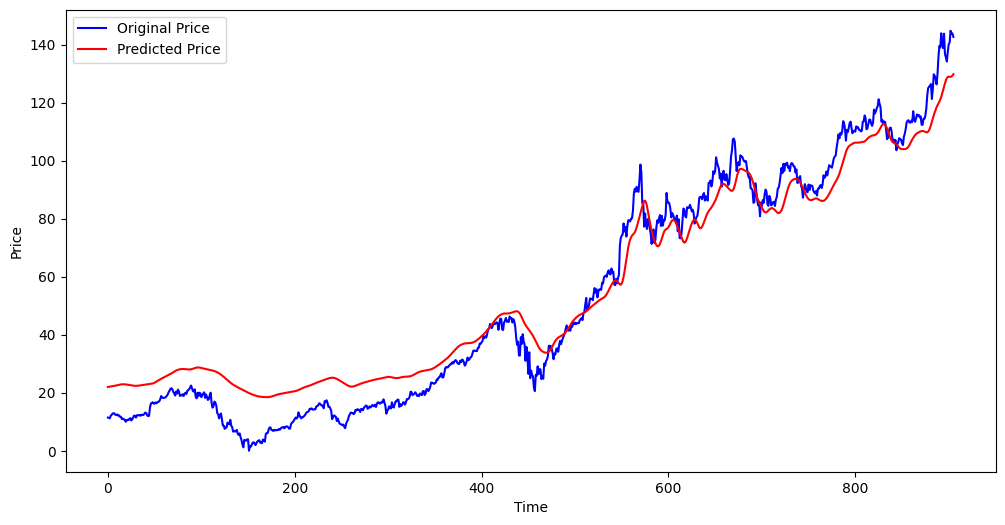

In [129]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show